In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [2]:
data = pd.read_csv("Tetuan City power consumption.csv")

# Printing first 5 records of the dataset
pd.options.display.max_columns = None
data.head(5)


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.800,0.083,0.051,0.119,34055.696,16128.875,20240.964
1,1/1/2017 0:10,6.414,74.500,0.083,0.070,0.085,29814.684,19375.076,20131.084
2,1/1/2017 0:20,6.313,74.500,0.080,0.062,0.100,29128.101,19006.687,19668.434
3,1/1/2017 0:30,6.121,75.000,0.083,0.091,0.096,28228.861,18361.094,18899.277
4,1/1/2017 0:40,5.921,75.700,0.081,0.048,0.085,27335.696,17872.340,18442.410


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
df = data.copy()

In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df.head()

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,1/1/2017 0:00,6.559,73.800,0.083,0.051,0.119,34055.696,16128.875,20240.964
1,1/1/2017 0:10,6.414,74.500,0.083,0.070,0.085,29814.684,19375.076,20131.084
2,1/1/2017 0:20,6.313,74.500,0.080,0.062,0.100,29128.101,19006.687,19668.434
3,1/1/2017 0:30,6.121,75.000,0.083,0.091,0.096,28228.861,18361.094,18899.277
4,1/1/2017 0:40,5.921,75.700,0.081,0.048,0.085,27335.696,17872.340,18442.410


In [7]:
# Assuming you have a DataFrame called 'df'
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [8]:
df['month'] = df['DateTime'].dt.month
df['day_of_month'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['day_of_year'] = df['DateTime'].dt.dayofyear
df['week_of_year'] = df['DateTime'].dt.isocalendar().week
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['quarter'] = df['DateTime'].dt.quarter
df['minute'] = df['DateTime'].dt.minute


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind_Speed                 52416 non-null  float64       
 4   general_diffuse_flows      52416 non-null  float64       
 5   diffuse_flows              52416 non-null  float64       
 6   Zone_1_Power_Consumption   52416 non-null  float64       
 7   Zone_2__Power_Consumption  52416 non-null  float64       
 8   Zone_3__Power_Consumption  52416 non-null  float64       
 9   month                      52416 non-null  int32         
 10  day_of_month               52416 non-null  int32         
 11  hour                       52416 non-null  int32         
 12  day_

In [10]:
df.describe()

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption,month,day_of_month,hour,day_of_year,week_of_year,day_of_week,quarter,minute
count,52416,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000
mean,2017-07-01 23:55:00,18.810,68.260,1.959,182.697,75.028,32344.971,21042.509,17835.406,6.511,15.679,11.500,182.500,26.500,3.000,2.505,25.000
min,2017-01-01 00:00:00,3.247,11.340,0.050,0.004,0.011,13895.696,8560.081,5935.174,1.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000
25%,2017-04-01 23:57:30,14.410,58.310,0.078,0.062,0.122,26310.669,16980.766,13129.327,4.000,8.000,5.750,91.750,13.750,1.000,2.000,10.000
50%,2017-07-01 23:55:00,18.780,69.860,0.086,5.035,4.456,32265.920,20823.168,16415.117,7.000,16.000,11.500,182.500,26.500,3.000,3.000,25.000
75%,2017-09-30 23:52:30,22.890,81.400,4.915,319.600,101.000,37309.018,24713.718,21624.100,9.250,23.000,17.250,273.250,39.250,5.000,3.250,40.000
max,2017-12-30 23:50:00,40.010,94.800,6.483,1163.000,936.000,52204.395,37408.861,47598.326,12.000,31.000,23.000,364.000,52.000,6.000,4.000,50.000
std,NaN,5.815,15.551,2.349,264.401,124.211,7130.563,5201.466,6622.165,3.441,8.772,6.922,105.078,15.008,2.000,1.116,17.078


In [11]:
zone_1 = df.copy()
zone_2 = df.copy()
zone_3 = df.copy()

In [12]:
zone_1.drop(['Zone_2__Power_Consumption','Zone_3__Power_Consumption','DateTime'],axis = 1, inplace=True)

In [13]:
zone_1

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,month,day_of_month,hour,day_of_year,week_of_year,day_of_week,quarter,minute
0,6.559,73.800,0.083,0.051,0.119,34055.696,1,1,0,1,52,6,1,0
1,6.414,74.500,0.083,0.070,0.085,29814.684,1,1,0,1,52,6,1,10
2,6.313,74.500,0.080,0.062,0.100,29128.101,1,1,0,1,52,6,1,20
3,6.121,75.000,0.083,0.091,0.096,28228.861,1,1,0,1,52,6,1,30
4,5.921,75.700,0.081,0.048,0.085,27335.696,1,1,0,1,52,6,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.400,0.080,0.040,0.096,31160.456,12,30,23,364,52,5,4,10
52412,6.947,72.600,0.082,0.051,0.093,30430.418,12,30,23,364,52,5,4,20
52413,6.900,72.800,0.086,0.084,0.074,29590.875,12,30,23,364,52,5,4,30
52414,6.758,73.000,0.080,0.066,0.089,28958.175,12,30,23,364,52,5,4,40


# Zone 1

## Splitting Dataset into Training and Testing


In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV

X = zone_1.drop(['Zone_1_Power_Consumption'], axis=1)
y = zone_1['Zone_1_Power_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [15]:
X_train.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows',
       'diffuse_flows', 'month', 'day_of_month', 'hour', 'day_of_year',
       'week_of_year', 'day_of_week', 'quarter', 'minute'],
      dtype='object')

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling (normalize features to [0, 1])
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[0.37973887, 0.74958064, 0.00326442, ..., 0.16666667, 0.33333333,
        0.2       ],
       [0.7199792 , 0.178289  , 0.75687859, ..., 0.33333333, 0.33333333,
        0.2       ],
       [0.63868283, 0.25928589, 0.7562568 , ..., 0.16666667, 0.66666667,
        0.        ],
       ...,
       [0.54014179, 0.463815  , 0.75734494, ..., 0.66666667, 0.66666667,
        0.8       ],
       [0.24971943, 0.77953511, 0.0054407 , ..., 0.66666667, 0.        ,
        0.4       ],
       [0.36112556, 0.87778577, 0.00341987, ..., 0.5       , 0.33333333,
        0.6       ]])

In [18]:
X_train.shape

(39312, 13)

In [19]:
X_test.shape

(13104, 13)

## Linear Regression

Accuracy on training set :  0.64
Accuracy on test set :  0.65
MSE on training set :  18095577.68
RMSE on training set :  4253.89
MSE on testing set :  17933694.13
RMSE on testing set :  4234.82
MAE on training set :  3384.12
MAE on testing set :  3367.0
MAPE on training set :  0.11
MAPE on testing set :  0.11


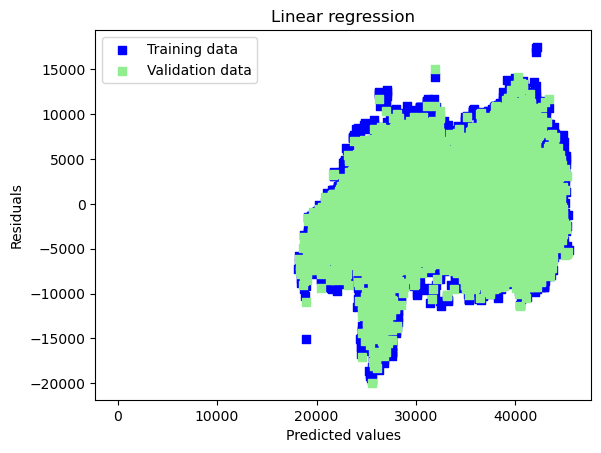

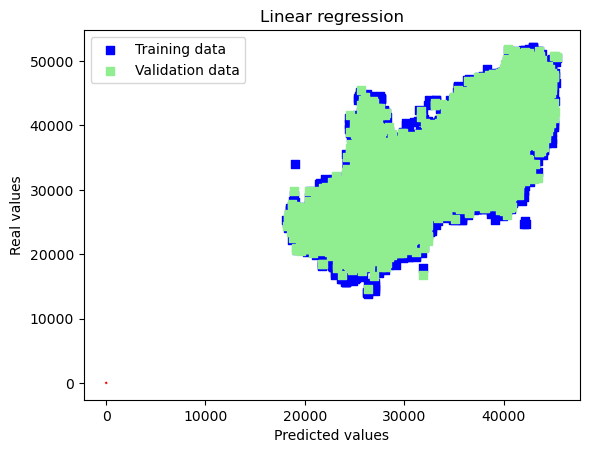

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,n_jobs=5)
lr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(lr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(lr.score(X_test,y_test),2)) 
lr_pred_test = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, lr_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,lr_pred_train))**0.5,2))
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, lr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,lr_pred_test))**0.5,2))
print("MAE on training set : ",round(mean_absolute_error(y_train, lr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, lr_pred_test),2))

print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, lr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, lr_pred_test),2))
# Plot residuals
plt.scatter(lr_pred_train, lr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lr_pred_test, lr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(lr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

##  SVR

Accuracy on training set :  0.11
Accuracy on test set :  0.11
MSE on testing set :  45526182.01
RMSE on testing set :  6747.31
MSE on training set :  45300555.39
MAE on training set :  5547.12
MAE on testing set :  5569.1
RMSE on training set :  6730.57
MAPE on training set :  0.18
MAPE on testing set :  0.18


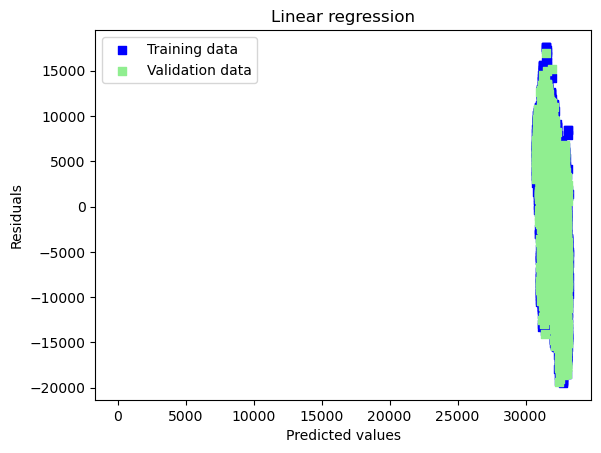

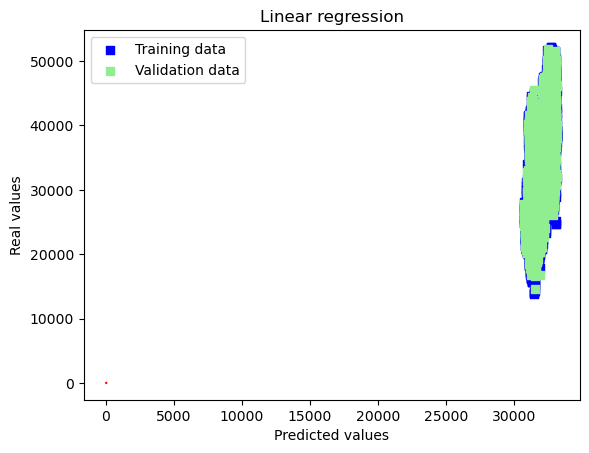

In [21]:
from sklearn.svm import SVR
svr = SVR( kernel='rbf', C=10, gamma=0.01)
svr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(svr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(svr.score(X_test,y_test),2)) 
svr_pred_test = svr.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, svr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,svr_pred_test))**0.5,2))
svr_pred_train = svr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, svr_pred_train),2))
print("MAE on training set : ",round(mean_absolute_error(y_train, svr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, svr_pred_test),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,svr_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, svr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, svr_pred_test),2))
# Plot residuals
plt.scatter(svr_pred_train, svr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(svr_pred_test, svr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(svr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(svr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.99
MSE on testing set :  485631.35
RMSE on testing set :  696.87
MSE on training set :  81420.44
RMSE on training set :  285.34
MAPE on training set :  0.01
MAPE on testing set :  0.01
MAE on training set :  183.46
MAE on testing set :  465.63


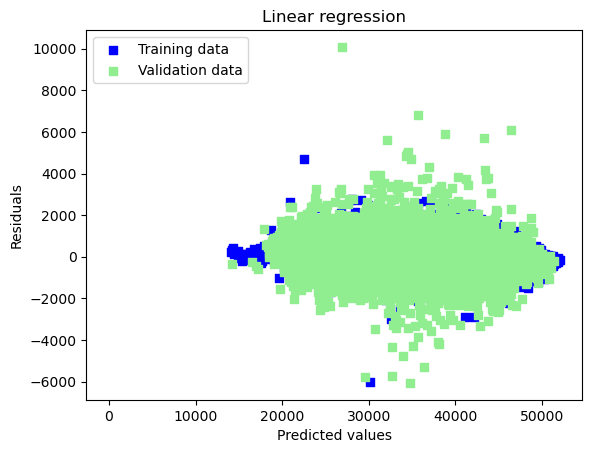

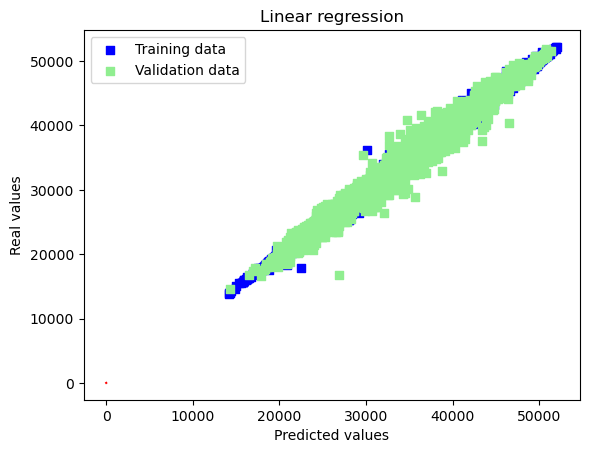

In [22]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=30, max_features =7,max_depth=None,min_samples_split=2,min_samples_leaf=1)

rf.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(rf.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(rf.score(X_test,y_test),2)) 

rf_pred_test = rf.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, rf_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,rf_pred_test))**0.5,2))
rf_pred_train = rf.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, rf_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,rf_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, rf_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, rf_pred_test),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, rf_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, rf_pred_test),2))
# Plot residuals
plt.scatter(rf_pred_train, rf_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(rf_pred_test, rf_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(rf_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(rf_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## DecisionTreeRegressor

Accuracy on training set :  0.98
Accuracy on test set :  0.97
MSE on testing set :  1426417.55
RMSE on testing set :  1194.33
MSE on training set :  839493.25
MAE on training set :  603.48
MAE on testing set :  788.76
RMSE on training set :  916.24
MAPE on training set :  0.02
MAPE on testing set :  0.03


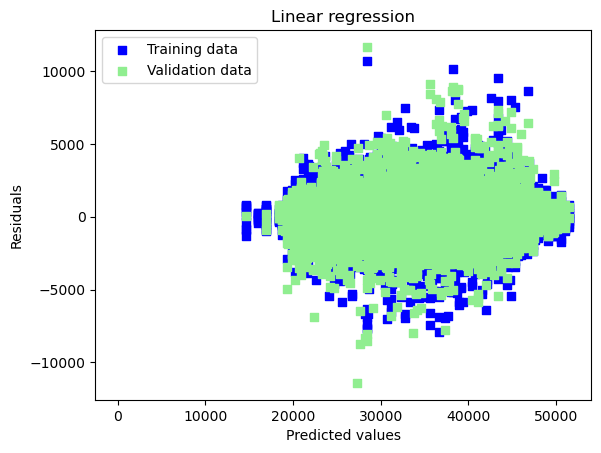

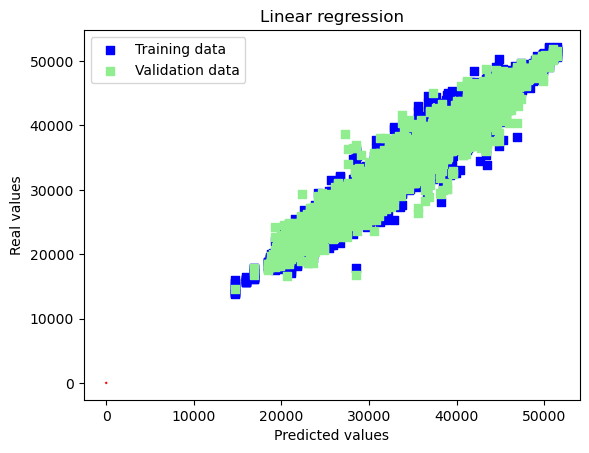

In [23]:
# Tuning
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
dtr = DecisionTreeRegressor(max_depth=None,min_samples_split=10, min_samples_leaf=10,max_features=9)

# Fit the model to the data
dtr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(dtr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(dtr.score(X_test,y_test),2)) 

dtr_pred_test = dtr.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, dtr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,dtr_pred_test))**0.5,2))
dtr_pred_train = dtr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, dtr_pred_train),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, dtr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, dtr_pred_test),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,dtr_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, dtr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, dtr_pred_test),2))
# Plot residuals
plt.scatter(dtr_pred_train, dtr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(dtr_pred_test, dtr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(dtr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(dtr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## FFNN

In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
N = 13
# Assuming you have X (features) and y (target) data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='selu', input_shape=(N,)),
    tf.keras.layers.Dense(1, activation='linear')  # Assuming regression task
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',  # Adjust loss function as needed
              metrics=['mae'])  # Adjust metrics as needed

model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - loss: 971390208.0000 - mae: 30193.8652 - val_loss: 411805792.0000 - val_mae: 17797.7871
Epoch 2/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 316155136.0000 - mae: 14713.2832 - val_loss: 187683856.0000 - val_mae: 10917.6748
Epoch 3/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - loss: 164979920.0000 - mae: 10217.0615 - val_loss: 133074088.0000 - val_mae: 9176.0127
Epoch 4/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - loss: 124628456.0000 - mae: 8900.2910 - val_loss: 106820120.0000 - val_mae: 8216.2168
Epoch 5/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 98960480.0000 - mae: 7905.9517 - val_loss: 82149816.0000 - val_mae: 7137.8887
Epoch 6/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - loss: 77380984.0000 - mae: 6950.5947 - val_loss: 63594104.0000 - val_mae: 6276.6328
Epoch 7/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 60235096.0000 - mae: 6123.2969 - val_loss: 52676268.0000 - val_m

In [25]:
# Evaluate model performance
val_y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, val_y_pred)
print("RMSE on testing set : ",round((mean_squared_error(y_val,val_y_pred))**0.5,2))
mae = mean_absolute_error(y_val, val_y_pred)
print(f'test MSE: {mse:.2f}, MAE: {mae:.2f}')

train_y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, train_y_pred)
print("RMSE on training set : ",round((mean_squared_error(y_train,train_y_pred))**0.5,2))
mae = mean_absolute_error(y_train, train_y_pred)
print(f'train MSE: {mse:.2f}, MAE: {mae:.2f}')

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
RMSE on testing set :  4421.94
test MSE: 19553562.73, MAE: 3441.51
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step
RMSE on training set :  4454.59
train MSE: 19843391.12, MAE: 3484.36


# Zone 2

In [26]:
zone_2

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption,month,day_of_month,hour,day_of_year,week_of_year,day_of_week,quarter,minute
0,2017-01-01 00:00:00,6.559,73.800,0.083,0.051,0.119,34055.696,16128.875,20240.964,1,1,0,1,52,6,1,0
1,2017-01-01 00:10:00,6.414,74.500,0.083,0.070,0.085,29814.684,19375.076,20131.084,1,1,0,1,52,6,1,10
2,2017-01-01 00:20:00,6.313,74.500,0.080,0.062,0.100,29128.101,19006.687,19668.434,1,1,0,1,52,6,1,20
3,2017-01-01 00:30:00,6.121,75.000,0.083,0.091,0.096,28228.861,18361.094,18899.277,1,1,0,1,52,6,1,30
4,2017-01-01 00:40:00,5.921,75.700,0.081,0.048,0.085,27335.696,17872.340,18442.410,1,1,0,1,52,6,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.400,0.080,0.040,0.096,31160.456,26857.318,14780.312,12,30,23,364,52,5,4,10
52412,2017-12-30 23:20:00,6.947,72.600,0.082,0.051,0.093,30430.418,26124.578,14428.812,12,30,23,364,52,5,4,20
52413,2017-12-30 23:30:00,6.900,72.800,0.086,0.084,0.074,29590.875,25277.693,13806.483,12,30,23,364,52,5,4,30
52414,2017-12-30 23:40:00,6.758,73.000,0.080,0.066,0.089,28958.175,24692.237,13512.605,12,30,23,364,52,5,4,40


In [27]:
zone_2.drop(['Zone_1_Power_Consumption','Zone_3__Power_Consumption','DateTime'],axis = 1, inplace=True)

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV

X = zone_2.drop(['Zone_2__Power_Consumption'], axis=1)
y = zone_2['Zone_2__Power_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling (normalize features to [0, 1])
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

Accuracy on training set :  0.6
Accuracy on test set :  0.6
MSE on training set :  10808294.66
RMSE on training set :  3287.6
MSE on testing set :  10903480.38
RMSE on testing set :  3302.04
MAPE on training set :  0.13
MAPE on testing set :  0.13
MAE on training set :  2587.8
MAE on testing set :  2605.14


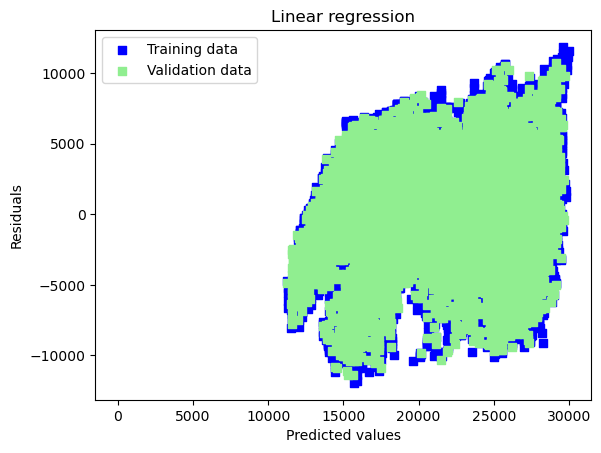

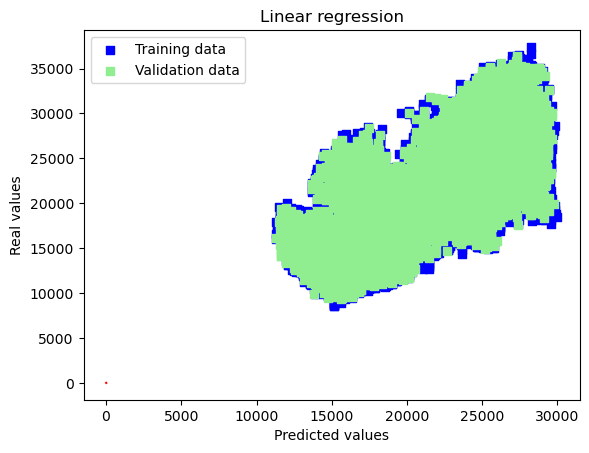

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,n_jobs=5)
lr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(lr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(lr.score(X_test,y_test),2)) 
lr_pred_test = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, lr_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,lr_pred_train))**0.5,2))
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, lr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,lr_pred_test))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, lr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, lr_pred_test),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, lr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, lr_pred_test),2))
# Plot residuals
plt.scatter(lr_pred_train, lr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lr_pred_test, lr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(lr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

##  SVR

Accuracy on training set :  0.17
Accuracy on test set :  0.17
MSE on testing set :  22489509.32
RMSE on testing set :  4742.31
MSE on training set :  22367999.29
RMSE on training set :  4729.48
MAPE on training set :  0.2
MAPE on testing set :  0.2
MAE on training set :  3854.21
MAE on testing set :  3855.52


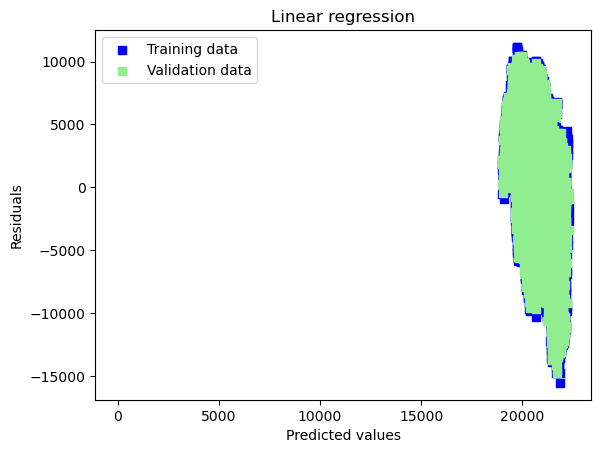

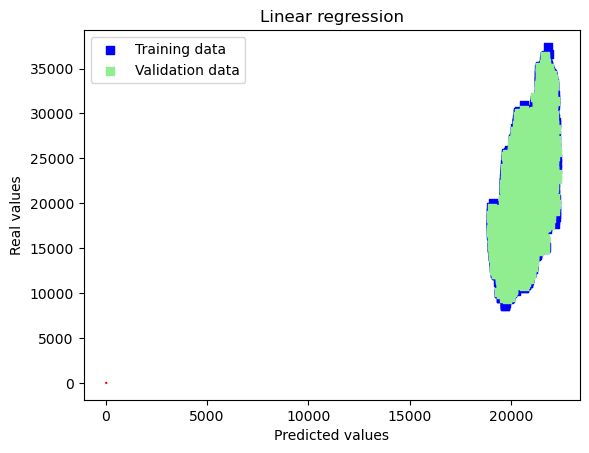

In [31]:
from sklearn.svm import SVR
svr = SVR( kernel='rbf', C=10, gamma=0.01)
svr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(svr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(svr.score(X_test,y_test),2)) 
svr_pred_test = svr.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, svr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,svr_pred_test))**0.5,2))
svr_pred_train = svr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, svr_pred_train),2))

#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,svr_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, svr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, svr_pred_test),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, svr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, svr_pred_test),2))
# Plot residuals
plt.scatter(svr_pred_train, svr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(svr_pred_test, svr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(svr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(svr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.99
MSE on testing set :  231417.51
RMSE on testing set :  481.06
MSE on training set :  38020.61
RMSE on training set :  194.99
MAPE on training set :  0.01
MAPE on testing set :  0.02
MAE on training set :  128.32
MAE on testing set :  326.96


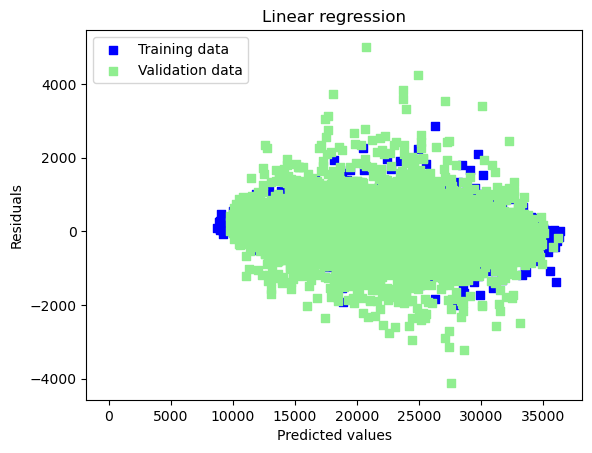

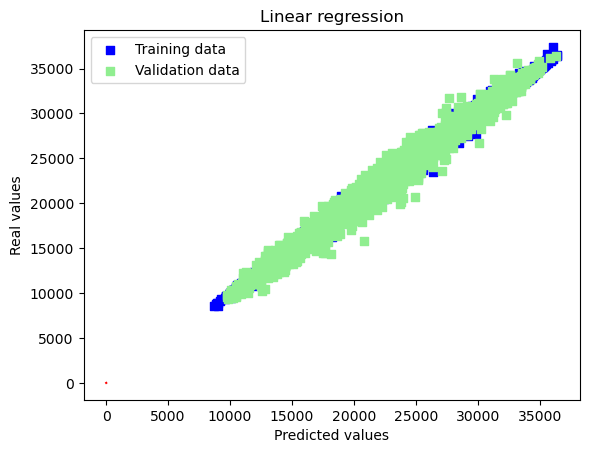

In [32]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=30, max_features =7,max_depth=None,min_samples_split=2,min_samples_leaf=1)

rf.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(rf.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(rf.score(X_test,y_test),2)) 

rf_pred_test = rf.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, rf_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,rf_pred_test))**0.5,2))
rf_pred_train = rf.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, rf_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,rf_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, rf_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, rf_pred_test),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, rf_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, rf_pred_test),2))
# Plot residuals
plt.scatter(rf_pred_train, rf_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(rf_pred_test, rf_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(rf_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(rf_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## DecisionTreeRegressor

Accuracy on training set :  0.98
Accuracy on test set :  0.97
MSE on testing set :  766153.34
RMSE on testing set :  875.3
MSE on training set :  440682.31
RMSE on training set :  663.84
MAPE on training set :  0.02
MAPE on testing set :  0.03
MAE on training set :  444.16
MAE on testing set :  579.66


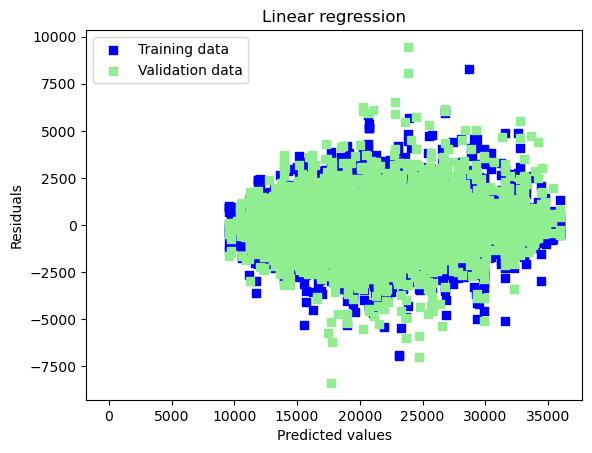

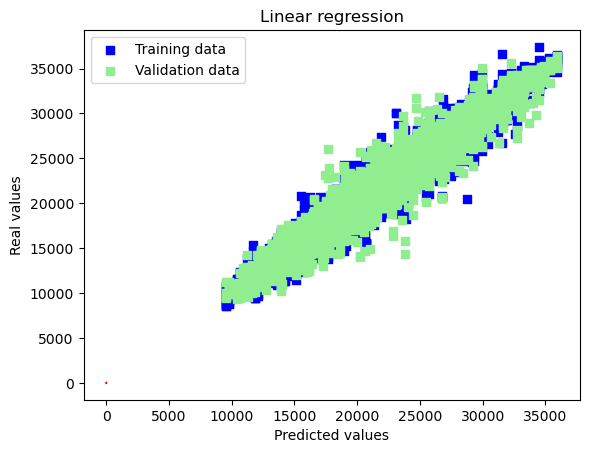

In [33]:
# Tuning
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
dtr = DecisionTreeRegressor(max_depth=None,min_samples_split=10, min_samples_leaf=10,max_features=9)

# Fit the model to the data
dtr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(dtr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(dtr.score(X_test,y_test),2)) 

dtr_pred_test = dtr.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, dtr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,dtr_pred_test))**0.5,2))
dtr_pred_train = dtr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, dtr_pred_train),2))

#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,dtr_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, dtr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, dtr_pred_test),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, dtr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, dtr_pred_test),2))
# Plot residuals
plt.scatter(dtr_pred_train, dtr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(dtr_pred_test, dtr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(dtr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(dtr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## FFNN

In [34]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
N = 13
# Assuming you have X (features) and y (target) data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='selu', input_shape=(N,)),
    tf.keras.layers.Dense(1, activation='linear')  # Assuming regression task
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',  # Adjust loss function as needed
              metrics=['mae'])  # Adjust metrics as needed

model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - loss: 407665664.0000 - mae: 19381.9180 - val_loss: 137761168.0000 - val_mae: 9998.1016
Epoch 2/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - loss: 104735768.0000 - mae: 8352.6436 - val_loss: 58120788.0000 - val_mae: 6056.5200
Epoch 3/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - loss: 52996256.0000 - mae: 5809.5928 - val_loss: 43192308.0000 - val_mae: 5319.4702
Epoch 4/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 41318840.0000 - mae: 5184.6533 - val_loss: 36541172.0000 - val_mae: 4881.0479
Epoch 5/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 34700172.0000 - mae: 4746.8037 - val_loss: 30756550.0000 - val_mae: 4461.8096
Epoch 6/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - loss: 29386006.0000 - mae: 4351.1533 - val_loss: 26757082.0000 - val_mae: 4161.4082
Epoch 7/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - loss: 25442530.0000 - mae: 4042.8728 - val_loss: 24122822.0000 - val_mae: 3952.

In [35]:
# Evaluate model performance
val_y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, val_y_pred)
print("RMSE on testing set : ",round((mean_squared_error(y_val,val_y_pred))**0.5,2))
mae = mean_absolute_error(y_val, val_y_pred)
print(f'test MSE: {mse:.2f}, MAE: {mae:.2f}')

train_y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, train_y_pred)
print("RMSE on training set : ",round((mean_squared_error(y_train,train_y_pred))**0.5,2))
mae = mean_absolute_error(y_train, train_y_pred)
print(f'train MSE: {mse:.2f}, MAE: {mae:.2f}')

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
RMSE on testing set :  3575.23
test MSE: 12782239.87, MAE: 2840.04
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step
RMSE on training set :  3557.41
train MSE: 12655194.48, MAE: 2822.68


# Zone 3

In [36]:
zone_3

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption,month,day_of_month,hour,day_of_year,week_of_year,day_of_week,quarter,minute
0,2017-01-01 00:00:00,6.559,73.800,0.083,0.051,0.119,34055.696,16128.875,20240.964,1,1,0,1,52,6,1,0
1,2017-01-01 00:10:00,6.414,74.500,0.083,0.070,0.085,29814.684,19375.076,20131.084,1,1,0,1,52,6,1,10
2,2017-01-01 00:20:00,6.313,74.500,0.080,0.062,0.100,29128.101,19006.687,19668.434,1,1,0,1,52,6,1,20
3,2017-01-01 00:30:00,6.121,75.000,0.083,0.091,0.096,28228.861,18361.094,18899.277,1,1,0,1,52,6,1,30
4,2017-01-01 00:40:00,5.921,75.700,0.081,0.048,0.085,27335.696,17872.340,18442.410,1,1,0,1,52,6,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.400,0.080,0.040,0.096,31160.456,26857.318,14780.312,12,30,23,364,52,5,4,10
52412,2017-12-30 23:20:00,6.947,72.600,0.082,0.051,0.093,30430.418,26124.578,14428.812,12,30,23,364,52,5,4,20
52413,2017-12-30 23:30:00,6.900,72.800,0.086,0.084,0.074,29590.875,25277.693,13806.483,12,30,23,364,52,5,4,30
52414,2017-12-30 23:40:00,6.758,73.000,0.080,0.066,0.089,28958.175,24692.237,13512.605,12,30,23,364,52,5,4,40


In [37]:
zone_3.drop(['Zone_1_Power_Consumption','Zone_2__Power_Consumption','DateTime'],axis = 1, inplace=True)

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV

X = zone_3.drop(['Zone_3__Power_Consumption'], axis=1)
y = zone_3['Zone_3__Power_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling (normalize features to [0, 1])
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

Accuracy on training set :  0.61
Accuracy on test set :  0.62
MSE on training set :  17006489.82
RMSE on training set :  4123.89
MSE on testing set :  16938881.01
RMSE on testing set :  4115.69
MAPE on training set :  0.2
MAPE on testing set :  0.2
MAE on training set :  3254.34
MAE on testing set :  3246.31


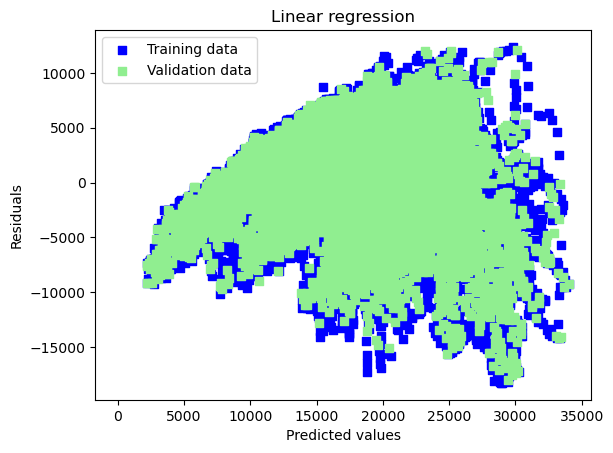

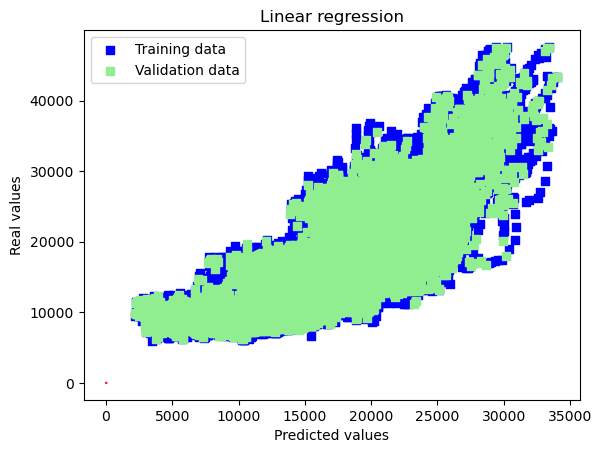

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,n_jobs=5)
lr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(lr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(lr.score(X_test,y_test),2)) 
lr_pred_test = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, lr_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,lr_pred_train))**0.5,2))
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, lr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,lr_pred_test))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, lr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, lr_pred_test),2))


print("MAE on training set : ",round(mean_absolute_error(y_train, lr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, lr_pred_test),2))
# Plot residuals
plt.scatter(lr_pred_train, lr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lr_pred_test, lr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(lr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

##  SVR

Accuracy on training set :  0.04
Accuracy on test set :  0.03
MSE on testing set :  42804771.01
RMSE on testing set :  6542.54
MSE on training set :  42137837.1
RMSE on training set :  6491.37
MAPE on training set :  0.26
MAPE on testing set :  0.27
MAE on training set :  4713.98
MAE on testing set :  4779.73


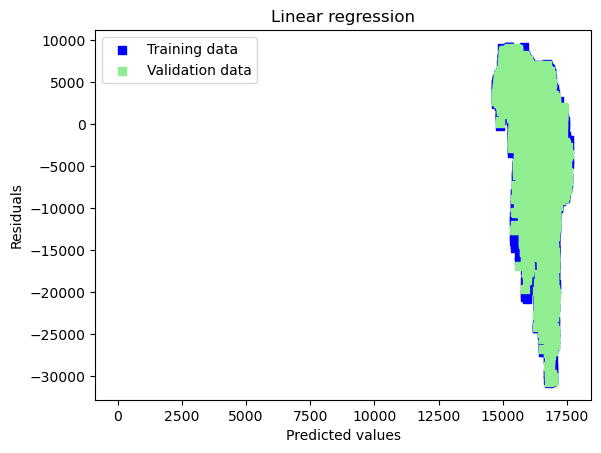

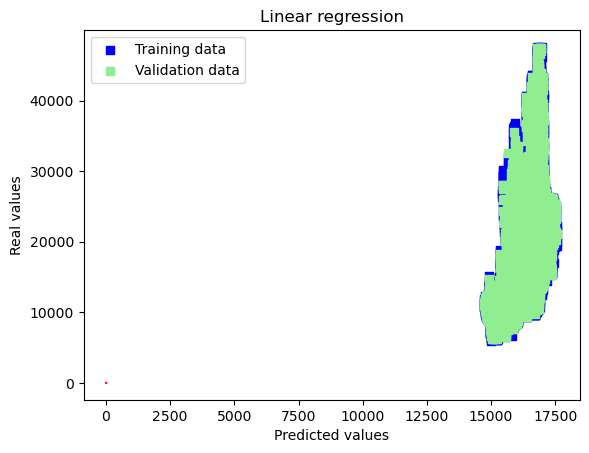

In [41]:
from sklearn.svm import SVR
svr = SVR( kernel='rbf', C=10, gamma=0.01)
svr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(svr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(svr.score(X_test,y_test),2)) 
svr_pred_test = svr.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, svr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,svr_pred_test))**0.5,2))
svr_pred_train = svr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, svr_pred_train),2))

#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,svr_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, svr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, svr_pred_test),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, svr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, svr_pred_test),2))
# Plot residuals
plt.scatter(svr_pred_train, svr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(svr_pred_test, svr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(svr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(svr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  1.0
MSE on testing set :  195427.99
RMSE on testing set :  442.07
MSE on training set :  32470.19
RMSE on training set :  180.19
MAPE on training set :  0.01
MAPE on testing set :  0.02
MAE on training set :  113.5
MAE on testing set :  287.98


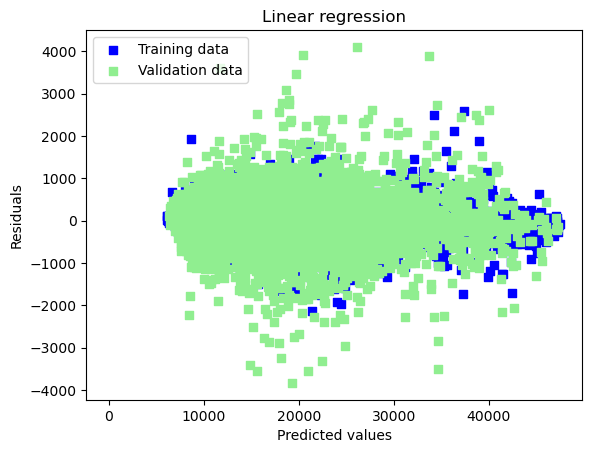

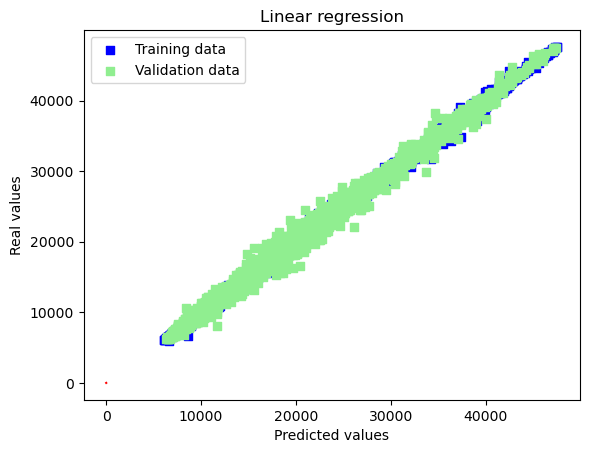

In [42]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=30, max_features =7,max_depth=None,min_samples_split=2,min_samples_leaf=1)

rf.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(rf.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(rf.score(X_test,y_test),2)) 

rf_pred_test = rf.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, rf_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,rf_pred_test))**0.5,2))
rf_pred_train = rf.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, rf_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,rf_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, rf_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, rf_pred_test),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, rf_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, rf_pred_test),2))
# Plot residuals
plt.scatter(rf_pred_train, rf_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(rf_pred_test, rf_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(rf_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(rf_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## DecisionTreeRegressor

Accuracy on training set :  0.99
Accuracy on test set :  0.99
MSE on testing set :  530313.17
RMSE on testing set :  728.23
MSE on training set :  318627.48
RMSE on training set :  564.47
MAPE on training set :  0.02
MAPE on testing set :  0.03
MAE on training set :  361.48
MAE on testing set :  468.74


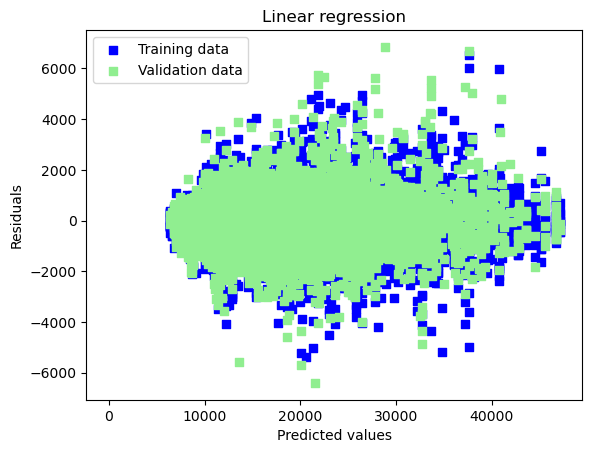

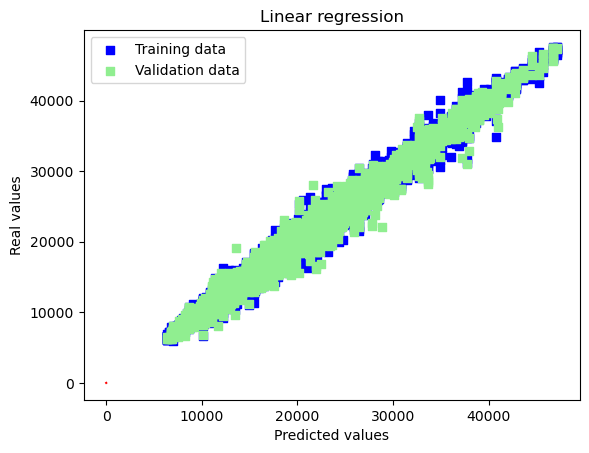

In [43]:
# Tuning
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
dtr = DecisionTreeRegressor(max_depth=None,min_samples_split=10, min_samples_leaf=10,max_features=9)

# Fit the model to the data
dtr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(dtr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on test set : ",round(dtr.score(X_test,y_test),2)) 

dtr_pred_test = dtr.predict(X_test)
#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, dtr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,dtr_pred_test))**0.5,2))
dtr_pred_train = dtr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, dtr_pred_train),2))

#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,dtr_pred_train))**0.5,2))
print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, dtr_pred_train),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, dtr_pred_test),2))

print("MAE on training set : ",round(mean_absolute_error(y_train, dtr_pred_train),2))
print("MAE on testing set : ",round(mean_absolute_error(y_test, dtr_pred_test),2))
# Plot residuals
plt.scatter(dtr_pred_train, dtr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(dtr_pred_test, dtr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(dtr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(dtr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## FFNN

In [44]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
N = 13
# Assuming you have X (features) and y (target) data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='selu', input_shape=(N,)),
    tf.keras.layers.Dense(1, activation='linear')  # Assuming regression task
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',  # Adjust loss function as needed
              metrics=['mae'])  # Adjust metrics as needed

model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 317003008.0000 - mae: 16336.6680 - val_loss: 134906976.0000 - val_mae: 9158.5527
Epoch 2/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - loss: 114849888.0000 - mae: 8428.5430 - val_loss: 88400120.0000 - val_mae: 7576.0977
Epoch 3/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 83582824.0000 - mae: 7370.0850 - val_loss: 71117048.0000 - val_mae: 6806.1162
Epoch 4/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 66915556.0000 - mae: 6532.9927 - val_loss: 55487956.0000 - val_mae: 5830.1235
Epoch 5/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52242332.0000 - mae: 5608.6606 - val_loss: 44262784.0000 - val_mae: 5101.0093
Epoch 6/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 42463828.0000 - mae: 4957.0488 - val_loss: 38093932.0000 - val_mae: 4704.8262
Epoch 7/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 36770888.0000 - mae: 4600.5889 - val_loss: 34254628.0000 - val_mae: 4466.6123
Epoch 8

In [45]:
# Evaluate model performance
val_y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, val_y_pred)
print("RMSE on testing set : ",round((mean_squared_error(y_val,val_y_pred))**0.5,2))
mae = mean_absolute_error(y_val, val_y_pred)
print(f'test MSE: {mse:.2f}, MAE: {mae:.2f}')

train_y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, train_y_pred)
print("RMSE on training set : ",round((mean_squared_error(y_train,train_y_pred))**0.5,2))
mae = mean_absolute_error(y_train, train_y_pred)
print(f'train MSE: {mse:.2f}, MAE: {mae:.2f}')

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
RMSE on testing set :  3964.87
test MSE: 15720198.59, MAE: 3146.23
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step
RMSE on training set :  3991.38
train MSE: 15931139.13, MAE: 3166.62


# hhh

In [49]:

zone1 = {'model_name': ['Linear Regression','SVR','Random Forest ',
                                    'DecisionTreeRegressor','FNN'],
    'Training RMSE':['4253.89','6730.57','285.34','916.24','4454.59'],
    'Training MAE':['3384','5547','183.46','603.48','3484.36'],
    'Testing RMSE':['4234.82','6747','696.87','1194.33','4421.94'],
    'Testing MAE':['3367','5569','465.63','788.76','3441.5']}


In [51]:
zone1_model_performance_metric = pd.DataFrame(zone1)
zone1_model_performance_metric

,model_name,Training RMSE,Training MAE,Testing RMSE,Testing MAE
0,Linear Regression,4253.89,3384,4234.82,3367
1,SVR,6730.57,5547,6747,5569
2,Random Forest,285.34,183.46,696.87,465.63
3,DecisionTreeRegressor,916.24,603.48,1194.33,788.76
4,FNN,4454.59,3484.36,4421.94,3441.5


In [52]:

zone2 = {'model_name': ['Linear Regression','SVR','Random Forest ',
                                    'DecisionTreeRegressor','FNN'],
    'Training RMSE':['3287.6','4729.48','194.99','663.84','3557.41'],
    'Training MAE':['2587.8','3854','128.32','444.16','2822.68'],
    'Testing RMSE':['3302.4','4742.3','481.06','875.3','3575'],
    'Testing MAE':['2605','3855.5','326.96','579.66','2840']}


In [53]:
zone2_model_performance_metric = pd.DataFrame(zone2)
zone2_model_performance_metric

,model_name,Training RMSE,Training MAE,Testing RMSE,Testing MAE
0,Linear Regression,3287.6,2587.8,3302.4,2605
1,SVR,4729.48,3854,4742.3,3855.5
2,Random Forest,194.99,128.32,481.06,326.96
3,DecisionTreeRegressor,663.84,444.16,875.3,579.66
4,FNN,3557.41,2822.68,3575,2840


In [54]:

zone3 = {'model_name': ['Linear Regression','SVR','Random Forest ',
                                    'DecisionTreeRegressor','FNN'],
    'Training RMSE':['4123.89','6491.3','180.19','564.47','3991.4'],
    'Training MAE':['3254.34','4713.98','113.5','361.48','3166.62'],
    'Testing RMSE':['4115.69','6542.54','442.07','728.23','3964.87'],
    'Testing MAE':['3246.3','4779.73','287.98','468.74','3146.23']}


In [55]:
zone3_model_performance_metric = pd.DataFrame(zone3)
zone3_model_performance_metric

,model_name,Training RMSE,Training MAE,Testing RMSE,Testing MAE
0,Linear Regression,4123.89,3254.34,4115.69,3246.3
1,SVR,6491.3,4713.98,6542.54,4779.73
2,Random Forest,180.19,113.5,442.07,287.98
3,DecisionTreeRegressor,564.47,361.48,728.23,468.74
4,FNN,3991.4,3166.62,3964.87,3146.23
